In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from tqdm import tqdm


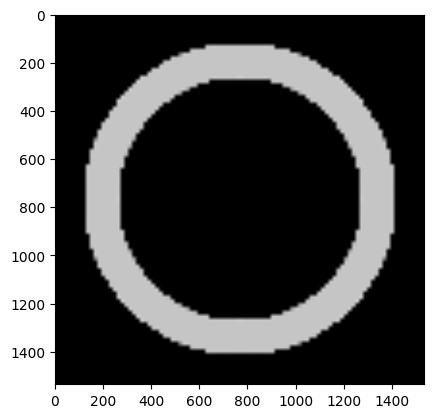

In [173]:
img = cv2.imread("img.png")
img = cv2.resize(img, (img.shape[0] * 16, img.shape[1] * 16))
# img = np.full_like(img, 255) - img
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# enhance
img_pil = Image.fromarray(img_gray)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
img = np.array(img_pil)

imshow(img, cmap="gray")


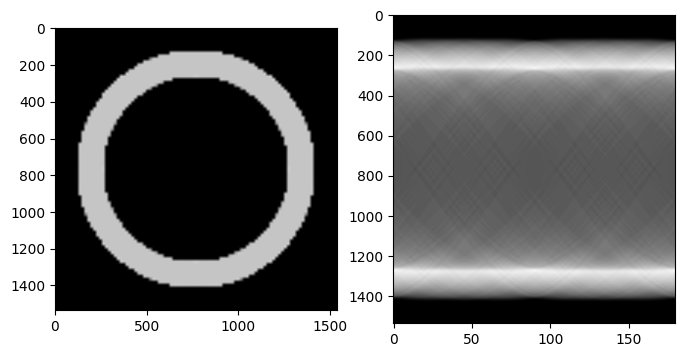

In [174]:
from skimage.transform import radon

# Perform Radon transform
theta = np.linspace(0.0, 180.0, 180, endpoint=False)
sng = radon(img, theta=theta, circle=True)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(sng, cmap="gray", aspect="auto")
plt.show()


In [219]:
def get_pos_angle(sinogram):
    pos, angle = np.unravel_index(np.argmax(sinogram, axis=None), sinogram.shape)

    return pos, angle


287.8431372549033
249.463345622671


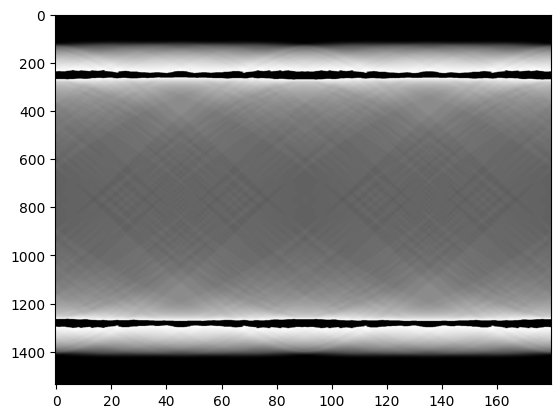

In [223]:
sinogram = sng.copy()
print(sinogram.max())

top = []

# top 101
for lp in range(10_000):
    pos, angle = get_pos_angle(sinogram)
    # mozna jako 3x3?
    sinogram[pos, angle] = 0
    # rng = lp // 1000
    # rng = 1
    # for i in range(pos - rng, pos + rng):
    #     for j in range(angle - rng, angle + rng):
    #         try:
    #             sinogram[i, j] = 2555
    #         except:
    #             print("trolololollolololloll, vedle")
    top.append([pos, angle])

print(sinogram.max())
plt.imshow(sinogram, cmap="gray", aspect="auto")
plt.show()


In [170]:
def get_vectors(pos, angle):
    unit_vector = np.array([np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))])
    unit_vector = unit_vector / np.sqrt(unit_vector[0] ** 2 + unit_vector[1] ** 2)

    normal_vector = np.array([-unit_vector[1], unit_vector[0]])
    normal_vector

    return unit_vector, normal_vector


In [171]:
print(len(top))


10000


100%|██████████| 10000/10000 [00:00<00:00, 21205.63it/s]

255 0


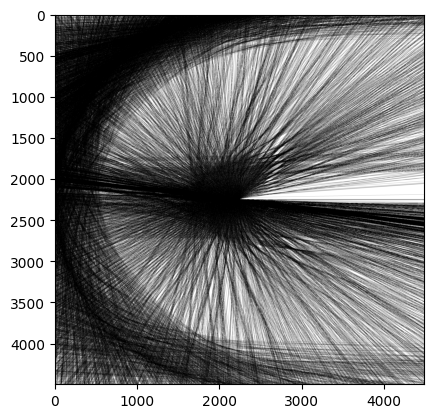

In [172]:
draw_img = np.full(img.shape, 255, dtype=np.uint8)
for pos, angle in tqdm(top[:]):
    # print(pos, angle)
    pos /= 2**1
    pos += 2**0

    unit, normal = get_vectors(pos, angle)
    # print(unit, normal)

    start = (
        np.array([img.shape[0] // 2, img.shape[1] // 2]) + unit * 10000 + normal * pos
    )
    end = start - unit * 20000

    # posun = [2**10, 2**10]
    # start += posun
    # end += posun

    cv2.line(
        draw_img,
        tuple(start.astype(int)),
        tuple(end.astype(int)),
        0,
        1,
    )

    # print(draw_img.shape, tmp_img.shape, np.full(draw_img.shape, 255, dtype=np.uint8).shape)
    # draw_img = cv2.addWeighted(draw_img, 1.0, tmp_img, 1.0, 0)
    # draw_img = tmp_img
    # print(draw_img.max(), draw_img.min())

print(draw_img.max(), draw_img.min())
imshow(draw_img, cmap="gray")
